# Classification of Cancer RNA-Seq Data

**Downloading packages:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

**Importing dataset:**

In [2]:
data = pd.read_csv('Data/data.csv')
data = data.drop(columns=['Unnamed: 0'], axis=1)

In [3]:
labels = pd.read_csv('Data/labels.csv')
labels = labels.drop(columns=['Unnamed: 0'], axis=1)

In [4]:
combined = data.copy()
combined['class'] = labels['Class']
combined

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,BRCA
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,LUAD
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,COAD
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,PRAD


**Tumor types in dataset:**

Text(0.5, 1.0, 'Frequency of Tumor Class Types')

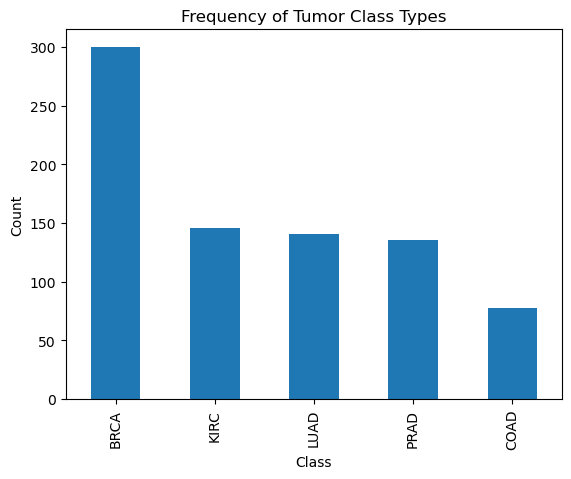

In [5]:
combined['class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Frequency of Tumor Class Types')

**Replacing class names with numbers in dataset:**

In [6]:
ints = combined.copy()
ints = ints.replace(['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD'], [1, 2, 3, 4, 5])

**3-D PCA:**

In [7]:
pca = PCA(n_components=3)
x = pca.fit_transform(combined.iloc[:,0:20531])

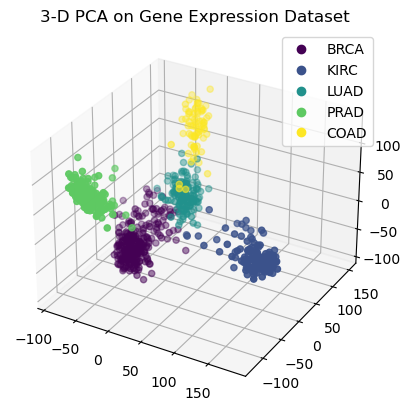

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(x[:,0], x[:,1], x[:,2], c=ints['class'])
ax.legend(handles=scatter.legend_elements()[0], labels=['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD'])
plt.title('3-D PCA on Gene Expression Dataset')
plt.show()

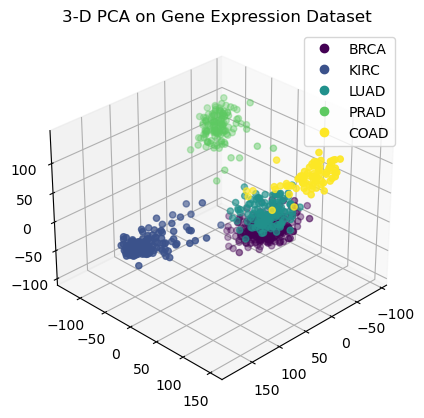

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=45)
scatter = ax.scatter(x[:,0], x[:,1], x[:,2], c=ints['class'])
ax.legend(handles=scatter.legend_elements()[0], labels=['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD'])
plt.title('3-D PCA on Gene Expression Dataset')
plt.show()

**Logistic Regression:**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(ints.iloc[:,0:20531], ints['class'], random_state=1,test_size=0.2)

In [16]:
lr = LogisticRegressionCV(Cs=[.00001, .0001, .001, .01, .1], cv=5, random_state=1, max_iter=5000, multi_class='multinomial').fit(x_train, y_train)
lr.C_

array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001])

In [17]:
predict_lr = lr.predict(x_test)
accuracy_score(y_test, predict_lr)

0.9937888198757764

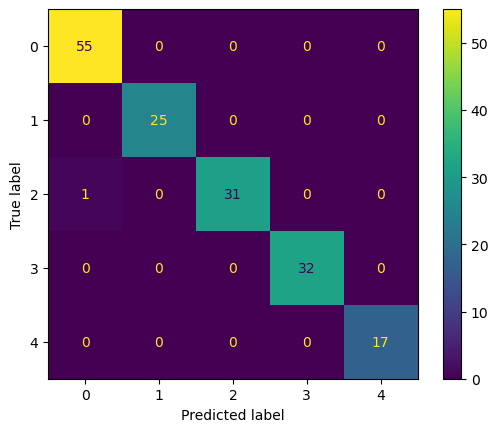

In [18]:
cm = confusion_matrix(y_test, predict_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [19]:
predict = lr.predict(x_test)
accuracy_score(y_test[y_test==1], predict[y_test==1])

1.0

In [20]:
predict = lr.predict(x_test)
accuracy_score(y_test[y_test==2], predict[y_test==2])

1.0

In [21]:
predict = lr.predict(x_test)
accuracy_score(y_test[y_test==3], predict[y_test==3])

0.96875

In [22]:
predict = lr.predict(x_test)
accuracy_score(y_test[y_test==4], predict[y_test==4])

1.0

In [23]:
predict = lr.predict(x_test)
accuracy_score(y_test[y_test==5], predict[y_test==5])

1.0

In [24]:
coefs = pd.DataFrame(zip(x_train.columns, np.transpose(lr.coef_[0]), np.transpose(lr.coef_[1]), np.transpose(lr.coef_[2]), np.transpose(lr.coef_[3]), np.transpose(lr.coef_[4])), columns=['features', 'BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']) 
coefs

,features,BRCA,KIRC,LUAD,PRAD,COAD
0,gene_0,-5.446380e-06,-8.990928e-07,0.000011,-0.000001,-0.000003
1,gene_1,-1.115830e-04,-1.602398e-04,0.000128,0.000075,0.000069
2,gene_2,-1.486759e-04,-1.576865e-04,0.000093,0.000210,0.000003
3,gene_3,-7.292525e-08,-1.318369e-04,-0.000086,-0.000047,0.000265
4,gene_4,1.255815e-04,-3.678669e-05,-0.000040,-0.000027,-0.000022
...,...,...,...,...,...,...
20526,gene_20526,4.579961e-05,4.770605e-06,-0.000101,-0.000113,0.000163
20527,gene_20527,5.950558e-05,-1.515340e-05,-0.000147,0.000010,0.000093
20528,gene_20528,1.175154e-04,-3.598317e-05,-0.000089,0.000042,-0.000035
20529,gene_20529,6.870930e-04,-9.644493e-05,-0.000323,-0.000022,-0.000246


In [56]:
coefs[['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']].abs().max()

BRCA    0.003533
KIRC    0.002165
LUAD    0.005303
PRAD    0.004101
COAD    0.002480
dtype: float64

In [57]:
idx = coefs['BRCA'].abs().idxmax()
coefs.loc[idx, 'features']

'gene_15589'

In [58]:
idx = coefs['KIRC'].abs().idxmax()
coefs.loc[idx, 'features']

'gene_3439'

In [59]:
idx = coefs['LUAD'].abs().idxmax()
coefs.loc[idx, 'features']

'gene_15898'

In [60]:
idx = coefs['PRAD'].abs().idxmax()
coefs.loc[idx, 'features']

'gene_9176'

In [61]:
idx = coefs['COAD'].abs().idxmax()
coefs.loc[idx, 'features']

'gene_5829'

**KNN:**

In [16]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [17]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
predict_knn = knn.predict(x_test)
accuracy_score(y_test, predict_knn)

0.9937888198757764

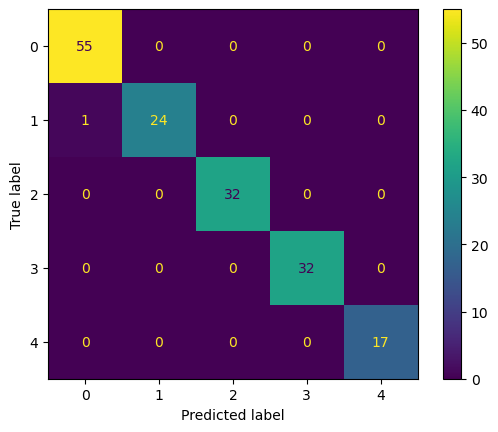

In [12]:
cm = confusion_matrix(y_test, predict_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [18]:
predict = knn.predict(x_test)
accuracy_score(y_test[y_test==1], predict[y_test==1])

1.0

In [19]:
predict = knn.predict(x_test)
accuracy_score(y_test[y_test==2], predict[y_test==2])

0.96

In [20]:
predict = knn.predict(x_test)
accuracy_score(y_test[y_test==3], predict[y_test==3])

1.0

In [21]:
predict = knn.predict(x_test)
accuracy_score(y_test[y_test==4], predict[y_test==4])

1.0

In [22]:
predict = knn.predict(x_test)
accuracy_score(y_test[y_test==5], predict[y_test==5])

1.0